# Interface with a ERRORR file

In [1]:
%%capture --no-stdout
import sandy

In [2]:
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

```
moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
9437 0 0 /
0.001 0. /
0/
broadr
-21 -22 -23 /
9437 1 0 0 0. /
0.001 /
900.0 /
0 /
thermr
0 -23 -24 /
0 9437 20 1 1 0 0 1 221 0 /
900.0 /
0.001 10 /
moder
-24 30 /
groupr
-21 -24 0 91 /
9437 9 0 6 1 1 1 1 /
'test'
900. /
1.0e10 /
3 /
3 456 'nu' /
0 /
0 /
errorr
-21 0 91 33 0 /
9437 9 6 0 1 /
0 900.0 /
0 33 /
errorr
-21 0 91 31 0 0 /
9437 9 6 1 1 /
1 900./
0 31 /
```

In [4]:
folder = "notebook_errorr_data"

In [5]:
filename = "tape33"
file = os.path.join(os.getcwd(), folder, filename)
tape = sandy.Errorr.from_file(file)

In [6]:
tape

MAT   MF  MT 
9437  1   451     9.423900+4 2.369986+2          6          0  ...
      3   18      9.423900+4 0.000000+0          0          0  ...
          102     9.423900+4 0.000000+0          0          0  ...
      33  18      9.423900+4 2.369986+2          0          0  ...
          102     9.423900+4 2.369986+2          0          0  ...
dtype: object

In [7]:
mf1 = sandy.errorr.read_mf1(tape, 9437)
mf1

{'MAT': 9437,
 'MF': 1,
 'MT': 451,
 'ZA': 94239.0,
 'AWR': 236.9986,
 'LRP': -11,
 'EG': array([1.00000e-05, 5.00000e-03, 1.00000e-02, 1.50000e-02, 2.00000e-02,
        2.50000e-02, 3.00000e-02, 3.50000e-02, 4.20000e-02, 5.00000e-02,
        5.80000e-02, 6.70000e-02, 8.00000e-02, 1.00000e-01, 1.40000e-01,
        1.80000e-01, 2.20000e-01, 2.50000e-01, 2.80000e-01, 3.00000e-01,
        3.20000e-01, 3.50000e-01, 4.00000e-01, 5.00000e-01, 6.25000e-01,
        7.80000e-01, 8.50000e-01, 9.10000e-01, 9.50000e-01, 9.72000e-01,
        9.96000e-01, 1.02000e+00, 1.04500e+00, 1.07100e+00, 1.09700e+00,
        1.12300e+00, 1.15000e+00, 1.30000e+00, 1.50000e+00, 2.10000e+00,
        2.60000e+00, 3.30000e+00, 4.00000e+00, 9.87700e+00, 1.59680e+01,
        2.77000e+01, 4.80520e+01, 7.55010e+01, 1.48728e+02, 3.67262e+02,
        9.06898e+02, 1.42510e+03, 2.23945e+03, 3.51910e+03, 5.53000e+03,
        9.11800e+03, 1.50300e+04, 2.47800e+04, 4.08500e+04, 6.73400e+04,
        1.11000e+05, 1.83000e+05, 3

In [8]:
xs_fiss = tape.get_xs(9437, 18)
xs_capture = tape.get_xs(9437, 102)

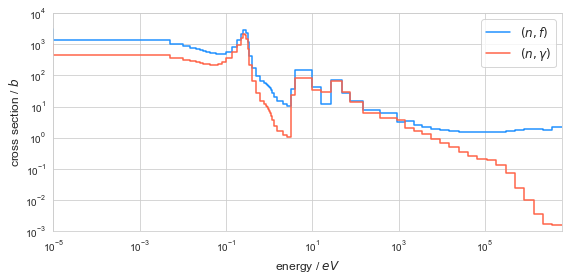

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xs_fiss.index.left, xs_fiss.values, drawstyle='steps-pre', color="dodgerblue", label="$(n,f)$")
ax.plot(xs_capture.index.left, xs_capture.values, drawstyle='steps-pre', color="tomato", label="$(n,\\gamma)$")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim([1e-5, 6e6])
ax.set_ylim([1e-3, 1e4])

ax.set_xlabel("energy / $eV$", fontsize="large")
ax.set_ylabel("cross section / $b$", fontsize="large")
ax.legend(loc=1, prop={"size": "large"})

plt.tight_layout();

In [10]:
mf33 = sandy.errorr.read_mf33(tape, 9437, 18)
mf33

{'MAT': 9437,
 'MF': 33,
 'MT': 18,
 'ZA': 94239.0,
 'AWR': 236.9986,
 'COVS': {18: array([[7.439680e-05, 7.439680e-05, 7.439680e-05, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         [7.439680e-05, 7.439680e-05, 7.439680e-05, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         [7.439680e-05, 7.439680e-05, 7.439680e-05, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         ...,
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.857652e-05,
          1.762574e-05, 2.061469e-05],
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.762574e-05,
          3.641884e-05, 2.939833e-05],
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.061469e-05,
          2.939833e-05, 3.454560e-05]]),
  102: array([[ 1.166280e-04,  1.166280e-04,  1.166280e-04, ...,  0.000000e+00,
           0.000000e+00,  0.000000e+00],
         [ 1.166280e-04,  1.166280e-04,  1.166280e-04, ...,  0.000000e+00,
           0.000000e+00,  0.000000e+00],
     

In [11]:
filename = "tape31"
file = os.path.join(os.getcwd(), folder, filename)
tape31 = sandy.Errorr.from_file(file)

In [12]:
nubar = tape31.get_xs(9437, 456)
mf31 = sandy.errorr.read_mf33(tape31, 9437, 456)

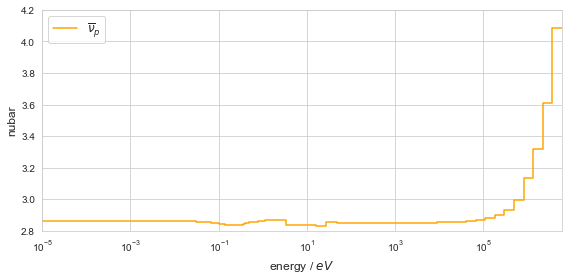

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(nubar.index.left, nubar.values, drawstyle='steps-pre', color="orange", label="$\\overline{\\nu}_p$")

ax.set_xscale("log")

ax.set_xlim([1e-5, 6e6])
ax.set_ylim([2.8, 4.2])

ax.set_xlabel("energy / $eV$", fontsize="large")
ax.set_ylabel("nubar", fontsize="large")
ax.legend(loc=2, prop={"size": "large"})

plt.tight_layout();